In [1]:
import pandas as pd

In [2]:
oil_data = pd.read_csv(r"C:\Users\kd67152\Desktop\Datasets\unconv_MV_v5.csv")
oil_data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [3]:
#importy modeles
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
X = oil_data.drop(["Prod"],axis=1)
y = oil_data["Prod"]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [6]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.9179069815299407

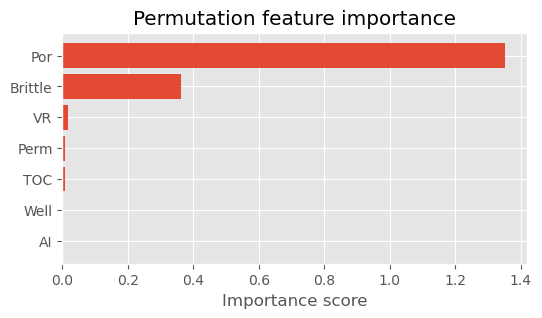

In [10]:
import rfpimp
imp = rfpimp.importances(rf, X_test, y_test)
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'])
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
plt.gca().invert_yaxis()
plt.show()

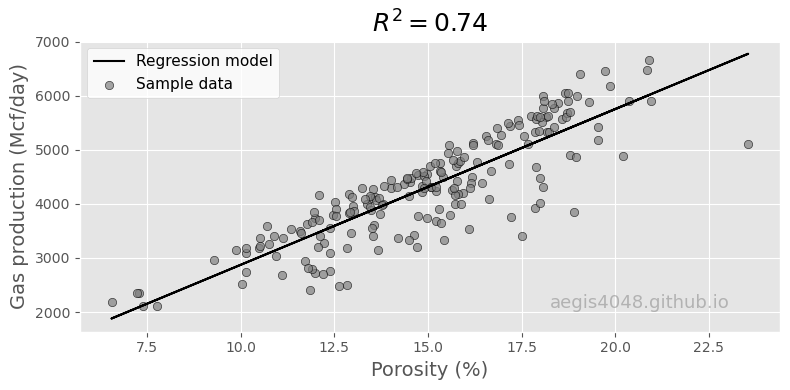

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

######################################## Data preparation #########################################

file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

X = df['Por'].values.reshape(-1,1)
y = df['Prod'].values

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()